# Insertion Sort

Builds final sorted array one item at a time, by repeatedly inserting a new element into the sorted portion of the array.

Steps:
1. Start with first element considered as sorted portion
2. Take next element from unsorted portion
3. Compare with each element in sorted portion from right to left
4. If sorted element is greater, shift it one position right
5. Insert current element in correct position
6. Repeat steps 2-5 until all elements are sorted

In [3]:
def insertion_sort(arr: list[int]) -> list[int]:
    sorted_arr = [arr.pop(0)]

    # Iterate over the input array
    for _ in range(len(arr)):

        # Get next value
        next_val = arr.pop(0)

        # Insert it into the sorted array in it's sorted position
        inserted = False
        for i in range(len(sorted_arr)):
            # skip lesser values
            if next_val > sorted_arr[i]:
                continue

            # insert into current position and break
            sorted_arr.insert(i, next_val)
            inserted = True
            break

        # Handle end case
        if not inserted:
            sorted_arr.append(next_val)

        inserted = False

    arr = sorted_arr
    
    return arr

func = insertion_sort
func_name = "Insertion Sort"

func([10, 4, 32, 8])

[4, 8, 10, 32]

Test case 1: Already sorted array
Original array: [   0    1    2 ... 9997 9998 9999]
Sorted array: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,

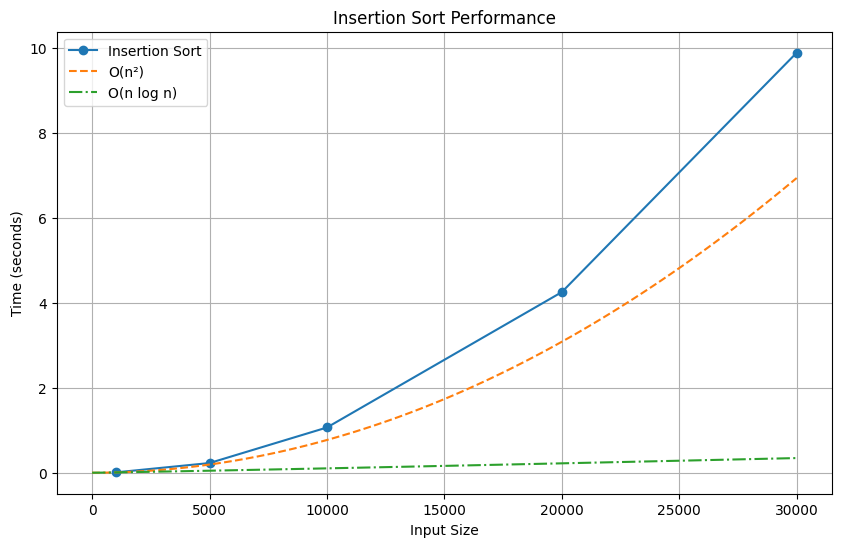

In [6]:
import time
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable

def test_sort(sort_func: Callable):
    # Test case 1: Already sorted array
    arr1 = np.arange(10000)
    print("Test case 1: Already sorted array")
    print("Original array:", arr1)
    start_time = time.time()
    sorted_arr1 = sort_func(arr1.copy().tolist())
    end_time = time.time()
    print("Sorted array:", sorted_arr1)
    print(f"Time taken: {(end_time - start_time) * 1000:.6f} ms")
    print()
    
    # Test case 2: Reverse sorted array
    arr2 = np.arange(10000, 0, -1)
    print("Test case 2: Reverse sorted array")
    print("Original array:", arr2)
    start_time = time.time()
    sorted_arr2 = sort_func(arr2.copy().tolist())
    end_time = time.time()
    print("Sorted array:", sorted_arr2)
    print(f"Time taken: {(end_time - start_time) * 1000:.6f} ms")
    print()
    
    # Test case 3: Random array
    arr3 = np.random.randint(-100000, 1000000, size=10000)
    print("Test case 3: Random array")
    print("Original array:", arr3)
    start_time = time.time()
    sorted_arr3 = sort_func(arr3.copy().tolist())
    end_time = time.time()
    print("Sorted array:", sorted_arr3)
    print(f"Time taken: {(end_time - start_time) * 1000:.6f} ms")
    print()
    
    # Test case 4: Array with duplicates
    arr4 = np.random.randint(-100, 100, size=10000)
    print("Test case 4: Array with duplicates")
    print("Original array:", arr4)
    start_time = time.time()
    sorted_arr4 = sort_func(arr4.copy().tolist())
    end_time = time.time()
    print("Sorted array:", sorted_arr4)
    print(f"Time taken: {(end_time - start_time) * 1000:.6f} ms")
    print()

def measure_performance(sort_func: Callable, sort_name: str):
    sizes = [1000, 5000, 10000, 20000, 30000]
    times = []
    
    for size in sizes:
        # Generate random array
        arr = np.random.randint(-100000, 1000000, size=size)
        
        # Measure time for bubble sort
        start_time = time.time()
        sort_func(arr.copy().tolist())
        end_time = time.time()
        
        times.append(end_time - start_time)
        print(f"Size {size}: {times[-1]:.6f} seconds")
    
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, times, 'o-', label=sort_name)
    
    # Plot O(n²) complexity for comparison
    # Create a separate array with more points for smoother curve
    x_smooth = np.linspace(1, max(sizes), 100)
    y_smooth = times[0] * (x_smooth/sizes[0])**2
    plt.plot(x_smooth, y_smooth, '--', label='O(n²)')

    # Plot O(n log n) complexity for comparison
    y_nlogn = times[0] * (x_smooth/sizes[0]) * np.log(x_smooth)/np.log(sizes[0])
    plt.plot(x_smooth, y_nlogn, '-.', label='O(n log n)')
    
    plt.xlabel('Input Size')
    plt.ylabel('Time (seconds)')
    plt.title(f'{sort_name} Performance')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the tests
test_sort(func)
print("Performance measurement:")
measure_performance(func, func_name)